# ELE 435/535 Computational Lab 3 

### Due Date: 10/8/2018 (Monday) 11:30 PM

### Name: 

# Getting started with Scikit-learn

# 1 -- Iris flowers dataset:

Scikit-learn includes some well-known datasets, one of which is the Iris flowers dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set). It contains 4 attributes (petal length and width, sepal length and width) about Iris flower species ("Setosa", "Versicolor", or "Virginica"). We would like to guess Iris species based on the attribute measures. 


1) importorting required Python packages:

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline 

2) Importing Iris dataset:

In [2]:
from sklearn import datasets
Iris_data = datasets.load_iris()
data_X = Iris_data.data #Data matrix
data_labels = Iris_data.target #Labels

3) Print the size of data array (data_X). How many labels does exist in the dataset? How many features does each Iris sample have? Hint: You can use X.shape command.

In [3]:
print('There are ' + str(data_X.shape[0]) + ' samples.')
print('There are ' + str(data_X.shape[1]) + ' features for each sample.')
print('There are ' + str(len(np.unique(data_labels))) + ' labels in the dataset.')

There are 150 samples.
There are 4 features for each sample.
There are 3 labels in the dataset.


4) Now, split the data into training/test sets using "train_test_split" command in scikit-learn. Consider 80% of the data to be training and the rest as the test data. Hint: "train_test_split" is a class in cross_validation subpackage of scikit_learn.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=111)

5) What does "random_state" argument of "train_test_split" class do? Why would it be useful?

In [5]:
print('The random_state argument is used to set the random seed to be used in RNG of splitting the data. It is useful when you want to ensure that code is reproducible when running it multiple times. For example, if everyone in the class used the same random_state, we should all produce the same output.')

The random_state argument is used to set the random seed to be used in RNG of splitting the data. It is useful when you want to ensure that code is reproducible when running it multiple times. For example, if everyone in the class used the same random_state, we should all produce the same output.


6) Select only the first two features for training/test data. Then, plot how training/test data are distributed in two dimensions. Use different colors for instances from different classes. Hint: "plt.scatter" will be helpful.

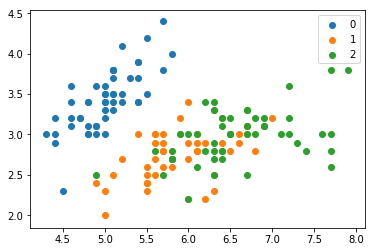

In [6]:
for label in np.unique(data_labels):
    idx = np.where(data_labels == label)
    plt.scatter(data_X[idx,0], data_X[idx,1], label=label)
    
plt.legend()
plt.show()

7) Dataset standardization: Scale each feature across training data to have zero mean and unit variance using numpy. (For the training data with 4 features). Hint: You may use np.mean(), and np.std() commands. Make sure that you compute mean across the correct axis.

Afterwards, standardize the test set using the computed training mean and variace.

In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean)/std
X_test_scaled = (X_test - mean)/std

8) Now, perform dataset standardization using Scikit-learn. Hint: You may find "StandardScalar" class from "preprocessing" sub-package of scikit-learn helpful.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_test_scaled_sk = scaler.transform(X_test)

# Check for correctness
print((X_test_scaled == X_test_scaled_sk).all())

# For use in the next part
X_scaled = scaler.fit(data_X).transform(data_X)

True


9) PCA with scikit-learn: Project the standardized data (with 4 features) onto the span of the first two principal components. Hint: you may use PCA command from scikit_learn.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_X = pca.fit(X_scaled).transform(X_scaled)

10) Visualize the projected data in two dimension (use the same colors as the ones used in step 6).

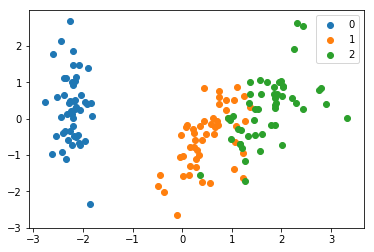

In [10]:
for label in np.unique(data_labels):
    idx = np.where(data_labels == label)
    plt.scatter(pca_X[idx,0], pca_X[idx,1], label=label)
    
plt.legend()
plt.show()

# Implementing different classifiers:

# 1) K-nearest neighbor classifier:

implement k-nearest clasifier using scikit-learn for k=1,2,...,10. Hint: you will find http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
 helpful. 
        
Plot training accuracy versus k. Plot test accuracy versus k.

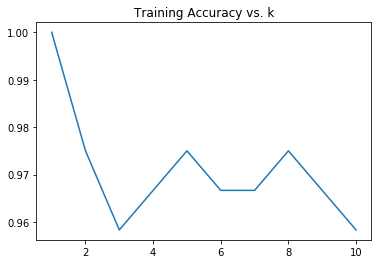

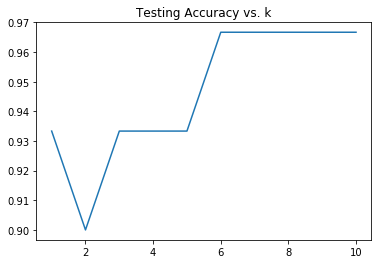

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 11)
train_accuracy, test_accuracy = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))
    
plt.plot(k_range, train_accuracy)
plt.title('Training Accuracy vs. k')
plt.show()

plt.plot(k_range, test_accuracy)
plt.title('Testing Accuracy vs. k')
plt.show()

# 2) Nearest mean classifier:

Implement nearest mean classifier and report the training and test accuracies. Hint: You will find the following link helpful: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [12]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

nc = NearestCentroid()
nc.fit(X_train_scaled, y_train)
print('Training accuracy is: ' + str(nc.score(X_train_scaled, y_train)))
print('Testing accuracy is: ' + str(nc.score(X_test_scaled, y_test)))

Training accuracy is: 0.8916666666666667
Testing accuracy is: 0.8333333333333334


# 3) Gaussian Naive Bayes:

Implement Gaussian Naive Bayes classifier using scikit-learn. Hint: You will find http://scikit-learn.org/stable/modules/naive_bayes.html helpful.

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Training accuracy is: ' + str(gnb.score(X_train_scaled, y_train)))
print('Testing accuracy is: ' + str(gnb.score(X_test_scaled, y_test)))

Training accuracy is: 0.9666666666666667
Testing accuracy is: 0.9


# 2-- MNIST Dataset

# 1) K-nearest neighbor classifier:
Implement k-nearest neighbor classifer for MNIST dataset where k = 1, 2, 3 (use the files that were given for HW1). You will use scikit-learn for this part but make sure that the data has the format that scikit-learn expects (training samples are in rows of the training matrix not in columns). Plot training/test accuracy as a function of k. (It takes a while to run this part)  http://scikit-learn.org/stable/modules/generate/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

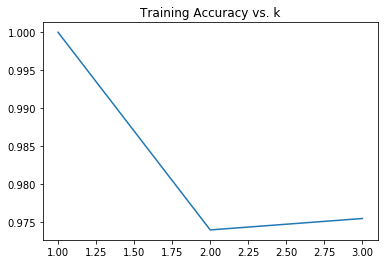

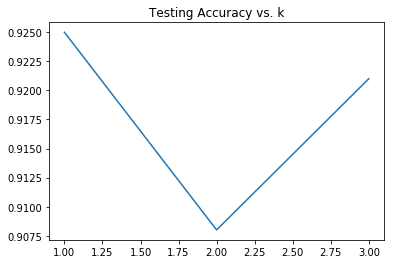

In [14]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='uint8')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='uint8')

train_data = train_data.T
test_data = test_data.T

mnist_train_y = np.empty((0))
mnist_test_y = np.empty((0))  

for i in range(10):
    mnist_train_y = np.concatenate((mnist_train_y, np.tile([i], 1000)))
    mnist_test_y = np.concatenate((mnist_test_y, np.tile([i], 100)))

k_range = range(1, 4)
train_accuracy, test_accuracy = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, mnist_train_y)
    train_accuracy.append(knn.score(train_data, mnist_train_y))
    test_accuracy.append(knn.score(test_data, mnist_test_y))
    
plt.plot(k_range, train_accuracy)
plt.title('Training Accuracy vs. k')
plt.show()

plt.plot(k_range, test_accuracy)
plt.title('Testing Accuracy vs. k')
plt.show()

# 2) Nearest centroid classifier:

implement nearest class mean classifier and report the training and test accuracies (using scikit-learn). http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [15]:
nc = NearestCentroid()
nc.fit(train_data, mnist_train_y)
print('Training accuracy is: ' + str(nc.score(train_data, mnist_train_y)))
print('Testing accuracy is: ' + str(nc.score(test_data, mnist_test_y)))

Training accuracy is: 0.8038
Testing accuracy is: 0.767


# 3) Gaussian Naive Bayes Classifier:

implement Gaussian naive Bayes classifer and report the training and test accuracies. (http://scikit-learn.org/stable/modules/naive_bayes.html)

In [16]:
gnb = GaussianNB()
gnb.fit(train_data, mnist_train_y)
print('Training accuracy is: ' + str(gnb.score(train_data, mnist_train_y)))
print('Testing accuracy is: ' + str(gnb.score(test_data, mnist_test_y)))

Training accuracy is: 0.588
Testing accuracy is: 0.549


# 4) PCA with scikit-learn:

Project the training data onto the span of first two principal components. Then visualize how the projected data is distributed in two dimensions. Use different colors for different digits.

/home/zachary/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/zachary/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


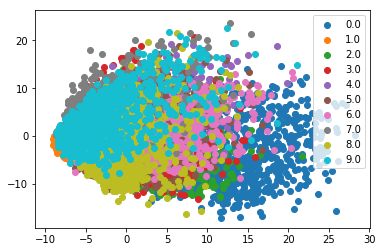

In [17]:
mnist_scaled = scaler.fit(train_data).transform(train_data)
pca_mnist = pca.fit(mnist_scaled).transform(mnist_scaled)

for label in np.unique(mnist_train_y):
    idx = np.where(mnist_train_y == label)
    plt.scatter(pca_mnist[idx,0], pca_mnist[idx,1], label=label)
    
plt.legend()
plt.show()

# 3 -- Cifar10 Dataset

cifar10 is one of the most widely used datasets for image recognition. It consists of 32*32 color images of 10 different objects ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'). Please take a look at the following page for more information: https://www.cs.toronto.edu/~kriz/cifar.html.
In this part, we are going to use just one subset of the whole dataset. Please download the file ("data_batch_1") from blackboard and impot it to numpy using the following function.

In [18]:
 def unpickle(file):
    import pickle
    fo = open(file,'rb')
    dictionary = pickle.load(fo,encoding='latin1')
    fo.close()
    return dictionary 

data_batch_1 = unpickle("data_batch_1")
data = data_batch_1['data']
labels = np.asarray(data_batch_1['labels'])
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

1) Print the dimension of data array. Why is the second dimension different from 32*32?

In [19]:
print(data.shape)
print('The dimension is 32*32*3 because of the 3 color channels. The images are not black and white like MNIST.')

(10000, 3072)
The dimension is 32*32*3 because of the 3 color channels. The images are not black and white like MNIST.


2) Plot one image (it can be any of them) from each class using the following function. Make sure that the title of the image is the name of the corresponding object. Hint: You may find np.where command helpful.

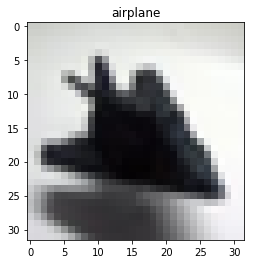

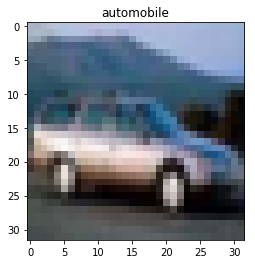

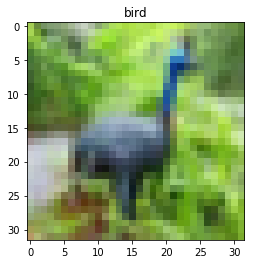

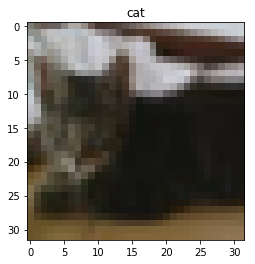

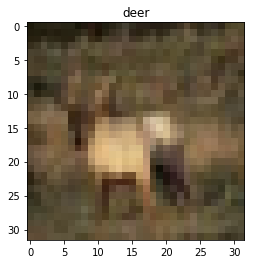

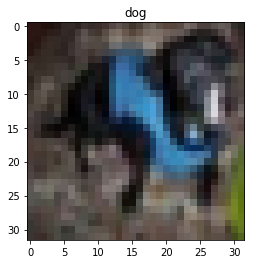

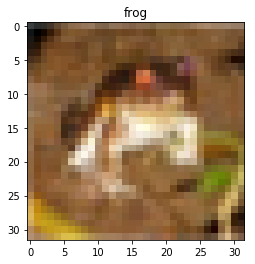

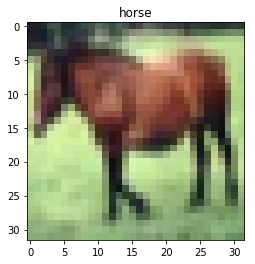

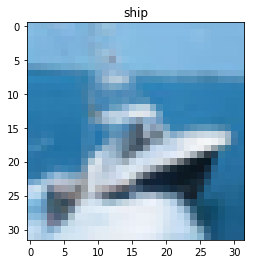

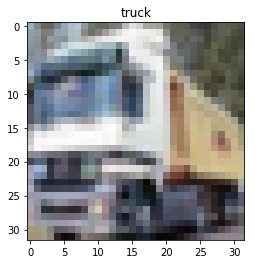

In [20]:
# Function that gets an integer and plots the corrsponding column of the data
def cifar10_show(pic_num):
    im = np.reshape(data[pic_num], (32,32,3), order='F')
    plt.figure()
    plt.imshow(np.transpose(im,(1,0,2)))
    plt.title(LABELS[labels[pic_num]])
    plt.show()

for label in np.unique(labels):
    idx = np.where(labels == label)[0][0]
    cifar10_show(idx)


3) Split the data into 80% training and 20% testing using "train_test"split" command from scikit-learn.

In [21]:
X_train_cifar, X_test_cifar, y_train_cifar, y_test_cifar = train_test_split(data, labels, test_size=0.2, random_state=111)

# 1) K-nearest neighbor classifier:

Implement k-nearest neighbor classifier for k=1,2. Print the training and test accuracies (it takes a while to run)  (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

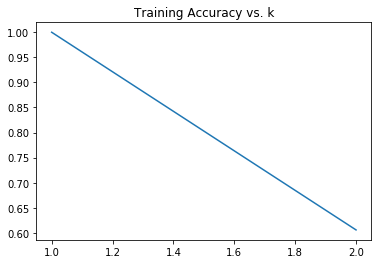

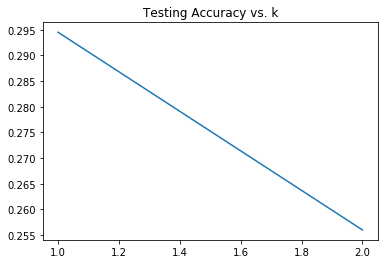

In [22]:
k_range = range(1, 3)
train_accuracy, test_accuracy = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_cifar, y_train_cifar)
    train_accuracy.append(knn.score(X_train_cifar, y_train_cifar))
    test_accuracy.append(knn.score(X_test_cifar, y_test_cifar))
    
plt.plot(k_range, train_accuracy)
plt.title('Training Accuracy vs. k')
plt.show()

plt.plot(k_range, test_accuracy)
plt.title('Testing Accuracy vs. k')
plt.show()

# 2) Nearest centroid classifier:

Implement nearest centroid classifier. What are the training/test accuracies? (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html).

In [23]:
nc = NearestCentroid()
nc.fit(X_train_cifar, y_train_cifar)
print('Training accuracy is: ' + str(nc.score(X_train_cifar, y_train_cifar)))
print('Testing accuracy is: ' + str(nc.score(X_test_cifar, y_test_cifar)))

Training accuracy is: 0.269875
Testing accuracy is: 0.2695


# 3) Gaussian Naive Bayes classifier:

Implement Gaussian naive Bayes classifier and report the training and test accuracies (http://scikit-learn.org/stable/modules/naive_bayes.html).

In [24]:
gnb = GaussianNB()
gnb.fit(X_train_cifar, y_train_cifar)
print('Training accuracy is: ' + str(gnb.score(X_train_cifar, y_train_cifar)))
print('Testing accuracy is: ' + str(gnb.score(X_test_cifar, y_test_cifar)))

Training accuracy is: 0.29125
Testing accuracy is: 0.276
